In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 6,3

import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

Populating the interactive namespace from numpy and matplotlib


### Первая часть

In [2]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [5]:
import math as m
df1 = df['mean symmetry']
n = df['mean symmetry'].shape[0]

In [6]:
mean = sum(df1)/(n)
s = m.sqrt(((df1 - mean)**2).sum()/(n - 1))
mu = (sorted(df1)[n//2 - 1]+sorted(df1)[n//2])/2
X_75 = sorted(df1)[3*n//4]
X_25 = sorted(df1)[n//4]

#В нашей выборки каждый обьект уникальный, поэтому мода отсутствует. Можно это проверить с помощью, например, модуля statistics
import statistics
try:
    mode = statistics.mode(df1)
    print('Мода: ', mode)
except:
    mode = 'Мода отсутствует'
    print(mode)

Мода отсутствует


In [7]:
print('Среднее X: {:.4f}, дисперсия : {:.4f}, s: {:.4f}, медиана: {:.4f}, Мода: {}, интерквартильный размах: {:.4f}'
     .format(mean, s**2, s, mu, mode, X_75-X_25))

Среднее X: 0.1812, дисперсия : 0.0008, s: 0.0274, медиана: 0.1792, Мода: Мода отсутствует, интерквартильный размах: 0.0338


In [8]:
df1.describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: mean symmetry, dtype: float64

#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

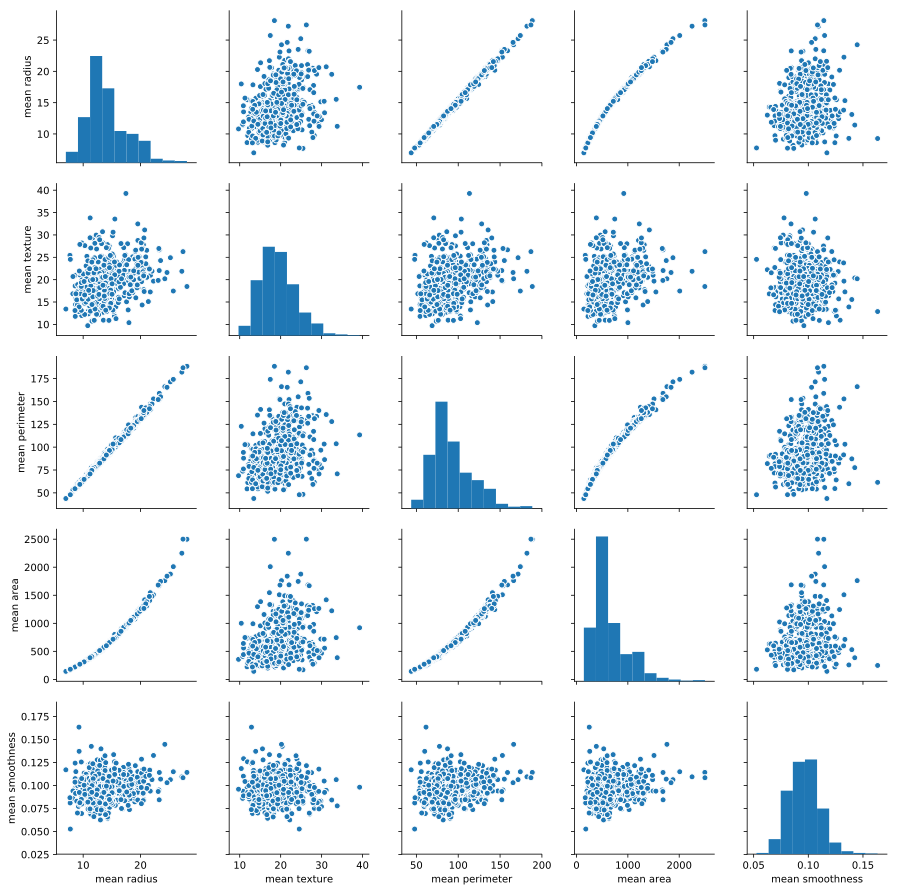

In [9]:
sns.pairplot(df.iloc[:,:5], vars=df.columns[:5])

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [10]:
corr = df.iloc[:, :5].corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


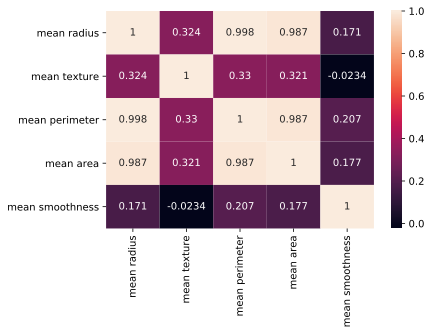

In [11]:
sns.heatmap(corr, annot=True, fmt='.3g')

Как видно, пары параметров ("mean perimeter", "mean radius") и ("mean areа", "mean radius") и ("mean area", "mean perimeter") самые зависимые. И самые независимые это пара ("mean smoothness", "mean texture").

#### Проверить найденные пары t-тестом

In [12]:
df['mean smoothness'].mean(), df['mean texture'].mean()

(0.096360281195079, 19.28964850615117)

Наш t-test проверяет равенство матожиданий одной выборки и матожидание другой (при условии их независимости).
Например, для параметров mean smoothness и mean texture матожидания равны соответственно: (0.096, 19.290).

То есть совершенно неравны. Стоит ожидать p-значение близкое к 0.

In [13]:
stats.ttest_ind(df['mean smoothness'], df['mean texture'])

Ttest_indResult(statistic=-106.44619509686147, pvalue=0.0)

Так и есть. P-value $-> 0$ 

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [14]:
print('Матожидание "mean compactness": {:.3f}'.format(df['mean compactness'].mean()))

Матожидание "mean compactness": 0.104


In [15]:
stats.ttest_1samp(df['mean compactness'], 0)

Ttest_1sampResult(statistic=47.12726263249825, pvalue=2.0059202200488077e-198)

Таким образом, матожидание неравно 0. Можно проверить р-значение для $M_{mean\ compactness} = 0.105$

In [16]:
stats.ttest_1samp(df['mean compactness'], 0.105)

Ttest_1sampResult(statistic=-0.29765496022966403, pvalue=0.7660753581629982)

Видно, что $p-value > 0.05$ и можно не отвергать гипотезу о том, что $M_{mean\ compactness} = 0.105$

Проверим гипотезу $H_0: M_{mean\ radius} = 14$ 

In [17]:
stats.ttest_1samp(df['mean radius'], 14)

Ttest_1sampResult(statistic=0.8616173566232037, pvalue=0.3892617071079777)

Видно, что $p-value > 0.05$ и можно не отвергать гипотезу о том, что $M_{mean\ radius} = 14$

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

Сравним выборку из столбца "worst texture" с нормальным распределением с помощью диаграммы и qq-plot.

Text(0.5,0,'$x$')

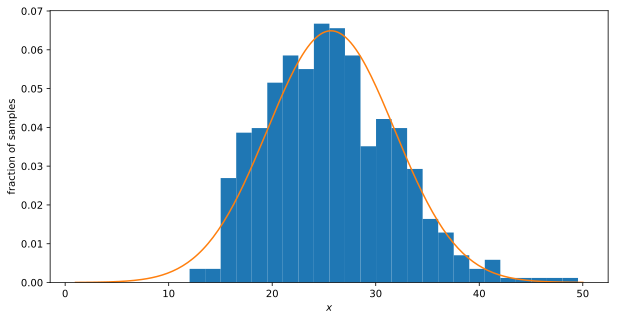

In [18]:
x = df['worst texture']
sp =np.linspace(1, 50, 200)
pdf = stats.norm(x.mean(), x.var()**0.5).pdf(sp)
plt.figure(figsize=(10,5))
plt.hist(x, density=True, bins=25)
plt.plot(sp, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

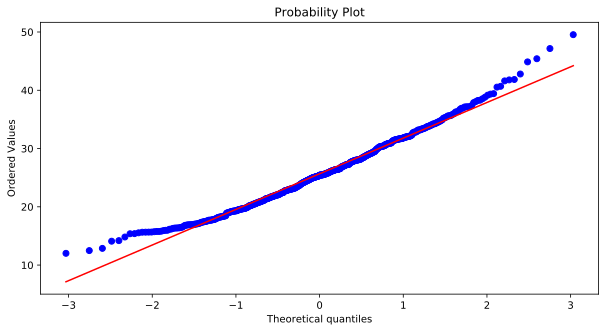

In [19]:
plt.figure(figsize=(10,5))
res = stats.probplot(x, plot=plt)

Как видно, наша выборка из колонки 'worst texture' неплохо совпадает в центре, но расходится на концах

Изобразим эмп. ф. распределения.

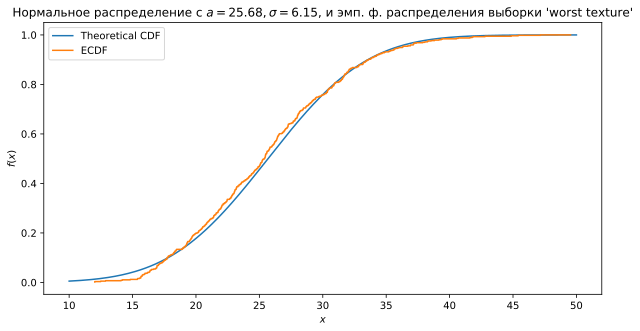

In [20]:
mean = df['worst texture'].mean()
std = df['worst texture'].var()**0.5
norm_rv = stats.norm(mean, std)

x = np.linspace(10,50,300)
cdf = norm_rv.cdf(x)

plt.figure(figsize=(10,5))
plt.plot(x, cdf, label='Theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['worst texture'])
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.title("Нормальное распределение с $a=25.68, \sigma=6.15$, и эмп. ф. распределения выборки 'worst texture'")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Видно, что эмп. ф. распределения неплохо соотноситься с нормальной.

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [21]:
poisson_rv = stats.poisson(2)
N = 1000
K = 10000

In [22]:
sample = poisson_rv.rvs(N*K)

In [23]:
sample = sample.reshape(N, K)

$$\bar{X} = \frac 1n \sum_i X_i - \text{выборочное среднее} $$

$$ Оценка\ среднего\ №2: \tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2. $$

Оценка типа №1 будет называться teta_mean, оценка №2 teta_average, чтобы избежать бОльшей путаницы.

Рассмотрим также два случая, в первом будем суммировать по столбцам, то есть мы будем иметь 10000 оценок среднего. В каждом столбце будет по 1000 обьектов. Затем будем суммировать по строкам, то есть мы будем иметь 1000 оценок среднего и в каждой строке будет по 10000 обьектов.

$$Первый\ случай.$$

Можно использовать циклы, а можно использовать родную функцию numpy.mean(). Посмотрим с какой точностью они совпадают.

In [24]:
teta_mean = np.mean(sample[:, :K], axis=0) 

In [43]:
teta_average_1 = []
teta=0
teta_mean = np.mean(sample[:, :K], axis=0)
for j in range(0, K):
    for i in range(1, N):
        teta += (sample[i][j] - teta_mean[j])**2
    teta = teta/(N-1)
    teta_average_1.append(teta)
    teta = 0

In [44]:
teta_average_2 = np.mean(((sample - np.mean(sample.T[:, :K], axis=1))**2).T, axis=1)

In [45]:
np.allclose(teta_average_1, teta_average_2, rtol=0.04)

True

Видно, что точность неплохо соотноситься у этих двух методов.

Text(0,0.5,'Mean')

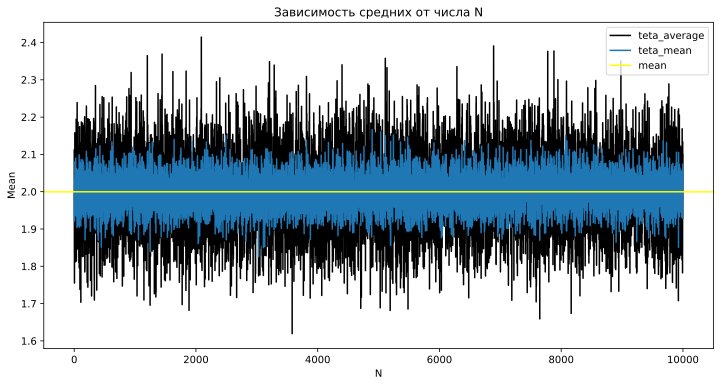

In [28]:
x = np.linspace(0, K, K)
plt.figure(figsize=(12,6))

plt.plot(x, teta_average_2, color='black')
plt.plot(x, teta_mean)
plt.axhline(sample.mean(), color='yellow')
plt.legend(['teta_average', 'teta_mean', 'mean'])
plt.title('Зависимость средних от числа N')
plt.xlabel('N')
plt.ylabel('Mean')

Видно, что teta_mean имеет меньшый разброс. 

Можно использовать цикл такого рода для поиска дисперсии, но можно обойтись без него, если применить reshape.

In [29]:
sigma_mean_1 = [np.mean((sample.T[i] - teta_mean[i])**2) for i in range(0,10000)]
sigma_average_1 = [np.mean((sample.T[i] - teta_average_2[i])**2) for i in range(0,10000)]

In [30]:
teta_mean = teta_mean.reshape(K,1)
teta_average_2 = teta_average_2.reshape(K,1)
sigma_mean = np.mean((sample.T - teta_mean)**2, axis=1)
sigma_average = np.mean((sample.T - teta_average_2)**2, axis=1)

In [31]:
np.allclose(sigma_mean, sigma_mean_1)

True

Как видно, эти два подхода идентичны.

Text(0,0.5,'Var')

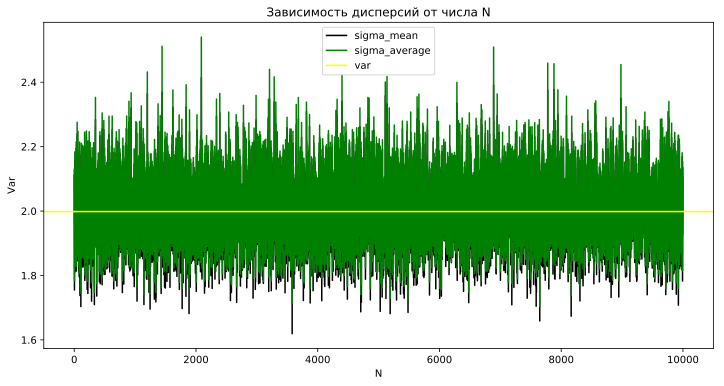

In [32]:
x = np.linspace(0, K, K)
plt.figure(figsize=(12,6))

plt.plot(x, sigma_mean, color='black')
plt.plot(x, sigma_average, color='green')
plt.axhline(sample.var(), color='yellow')
plt.legend(['sigma_mean', 'sigma_average', 'var'])
plt.title('Зависимость дисперсий от числа N')
plt.xlabel('N')
plt.ylabel('Var')

Оценки дисперсий практически одинаковы. Рассмотрим средние этих оценок.

(1.9975, 2.0025)

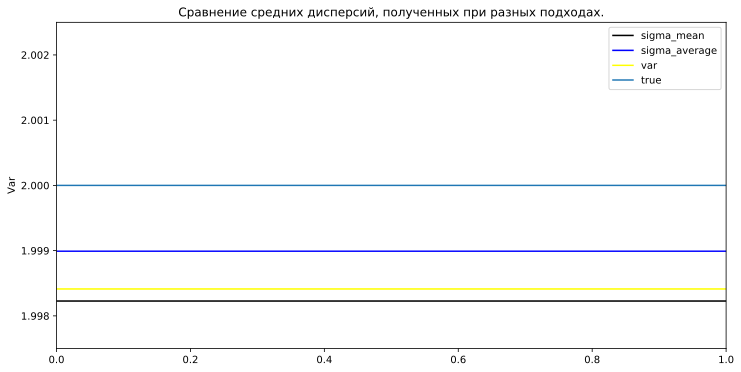

In [51]:
x = np.linspace(0, K, K)
plt.figure(figsize=(12,6))

plt.axhline(np.mean(sigma_mean), color='black')
plt.axhline(np.mean(sigma_average), color='blue')
plt.axhline(sample.var(), color = 'yellow')
plt.axhline(2)
plt.legend(['sigma_mean', 'sigma_average', 'var', 'true'])
plt.title('Сравнение средних дисперсий, полученных при разных подходах.')
plt.ylabel('Var')
plt.ylim(1.9975, 2.0025)

Видно, что "зеленая" оценка ближе к истине, то есть sigma_average более подходящая оценка для первого случая.

$$Второй\ случай.$$

In [34]:
teta_mean = np.mean(sample[:, :K], axis=1)

In [35]:
teta_average = np.mean(((sample - np.mean(sample.T[:, :K], axis=1))**2), axis=1)

Text(0.5,0,'N')

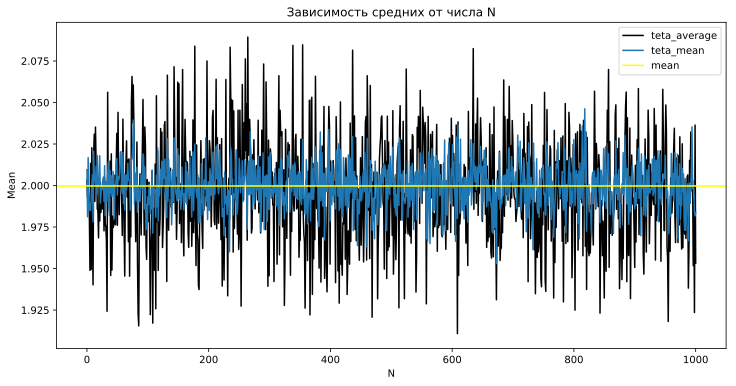

In [36]:
x = np.linspace(0, N, N)
plt.figure(figsize=(12,6))

plt.plot(x, teta_average, color='black')
plt.plot(x, teta_mean)
plt.axhline(sample.mean(), color='yellow')
plt.legend(['teta_average', 'teta_mean', 'mean'])
plt.title('Зависимость средних от числа N')
plt.ylabel('Mean')
plt.xlabel('N')

Можно использовать цикл такого рода, но можно обойтись без него, если применить reshape.

In [37]:
sigma_mean_1 = [np.mean((sample[i] - teta_mean[i])**2) for i in range(0,1000)]
sigma_average_1 = [np.mean((sample[i] - teta_average[i])**2) for i in range(0,1000)]

In [38]:
teta_mean = teta_mean.reshape(N,1)
teta_average = teta_average.reshape(N,1)
sigma_mean = np.mean((sample - teta_mean)**2, axis=1)
sigma_average = np.mean((sample - teta_average)**2, axis=1)

In [39]:
np.allclose(sigma_mean_1, sigma_mean)

True

Как видно, эти два подхода идентичны.

Text(0.5,0,'N')

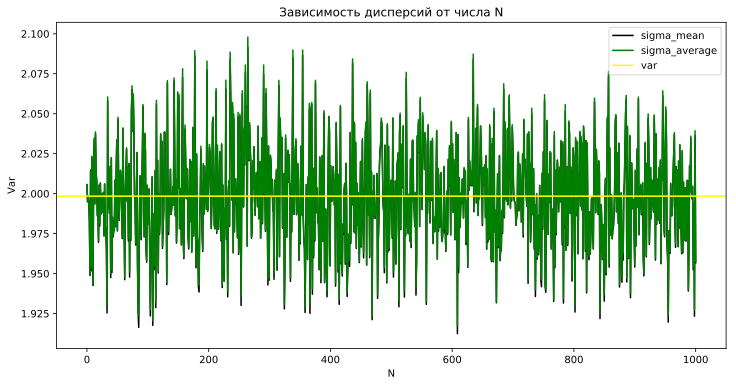

In [40]:
x = np.linspace(0, N, N)
plt.figure(figsize=(12,6))

plt.plot(x, sigma_mean, color='black')
plt.plot(x, sigma_average, color='green')
plt.axhline(sample.var(), color='yellow')
plt.legend(['sigma_mean', 'sigma_average', 'var'])
plt.title('Зависимость дисперсий от числа N')
plt.ylabel('Var')
plt.xlabel('N')

(1.998, 2.002)

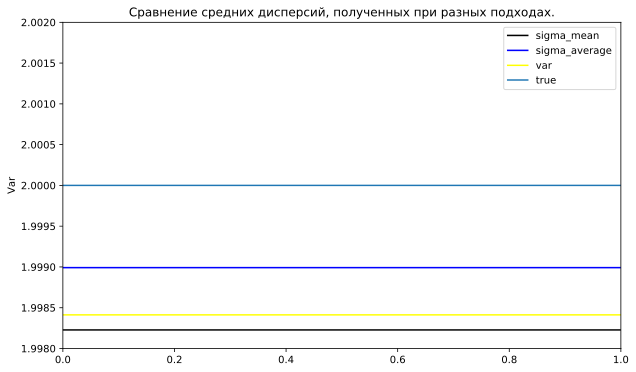

In [47]:
x = np.linspace(0, N, N)
plt.figure(figsize=(10,6))

plt.axhline(np.mean(sigma_mean), color='black')
plt.axhline(np.mean(sigma_average), color='blue')
plt.axhline(sample.var(), color='yellow')
plt.axhline(2)
plt.legend(['sigma_mean', 'sigma_average', 'var', 'true'])
plt.title('Сравнение средних дисперсий, полученных при разных подходах.')
plt.ylabel('Var')
plt.ylim(1.998, 2.002)

Общий вывод: Для первого случая, когда мы суммировали по столбцам, то есть когда средних было 10000 (усреднение происходило на 1000 обьектах) точность второго метода была выше точности первого. И во втором случая, когда наших средний уже было 1000 (то есть значения усреднялись на 10000 обьектах) второй метод показывает значительно лучшее усреднее, более того значение дисперсии ближе к истинному не только в сравнении с обычным усреднением, но в сравнении с родной функцией sample.var().